In [19]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<style>
/* === BASE HEADING === */ 
h1 {
  height: 100px;
  position: relative;
  padding: 0;
  margin: 0;
  font-family: "Raleway", sans-serif;
  font-weight: 300;
  font-size: 40px;
  color: #080808;
  -webkit-transition: all 0.4s ease 0s;
  -o-transition: all 0.4s ease 0s;
  transition: all 0.4s ease 0s;
}

h1 span {
  display: block;
  font-size: 0.5em;
  line-height: 1.3;
}
h1 em {
  font-style: normal;
  font-weight: 600;
}

/* === HEADING STYLE #2 === */
.two h1 {
  text-transform: capitalize;
}
.two h1:before {
  position: absolute;
  left: 0;
  bottom: 0;
  width: 60px;
  height: 2px;
  content: "";
  background-color: #c50000;
  margin-bottom: 10px;
}

.two h1 span {
  font-size: 13px;
  font-weight: 500;
  text-transform: uppercase;
  letter-spacing: 4px;
  line-height: 3em;
  padding-left: 0.25em;
  color: rgba(0, 0, 0, 0.4);
  padding-bottom: 10px;
}
.alt-two h1 {
  text-align:center;
}
.alt-two h1:before {
  left:50%; margin-left:-30px;
}

/* ------- Helper Styles -------------*/
*,
*:before,
*:after {
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  box-sizing: border-box;
}
body {
  background: #eee;
}
div {
  position: relative;
  background: #f8f8f8;
  padding: 2em;
  margin: 1.5em auto;
  border: 3px solid rgba(0, 0, 0, 0.08);
}

h1:before,
h1:after {
  background-color: #c50000;
}
</style>

<div class="two">
  <h1>EDA
    <span>Exploratory Dataset Analysis</span>
  </h1>
</div>

### Sample Images

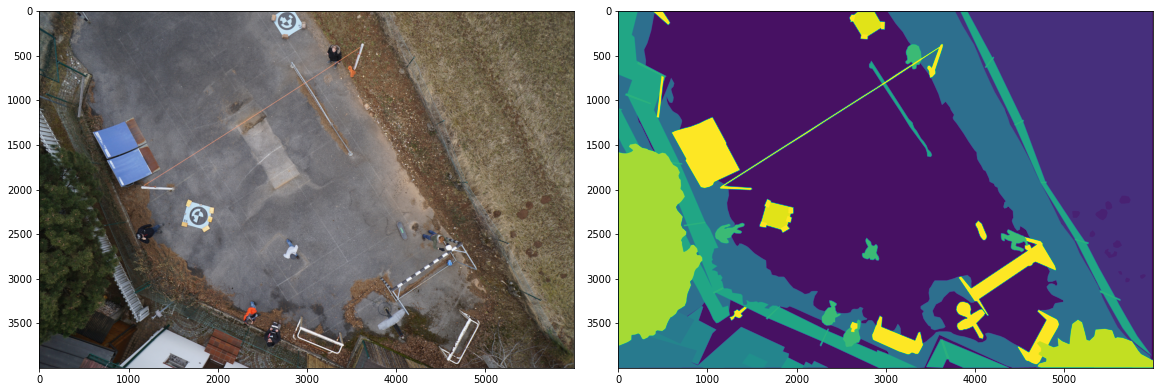

In [20]:
original_image =  r'C:/Users/leekh/Desktop/drone/dataset/semantic_drone_dataset/original_images/001.jpg'
label_image_semantic = r'C:/Users/leekh/Desktop/drone/dataset/semantic_drone_dataset/label_images_semantic/001.png'

fig, axs = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

original_image_semantic = np.asarray(Image.open(original_image))

axs[0].imshow(original_image_semantic)
axs[0].grid(False)

label_image_semantic = np.asarray(Image.open(label_image_semantic))
axs[1].imshow(label_image_semantic)
axs[1].grid(False)

In [21]:
original_image_semantic.shape, label_image_semantic.shape

((4000, 6000, 3), (4000, 6000))

In [22]:
original_image_semantic.min(), original_image_semantic.max()

(0, 255)

In [23]:
label_image_semantic.min(), label_image_semantic.max()

(0, 22)

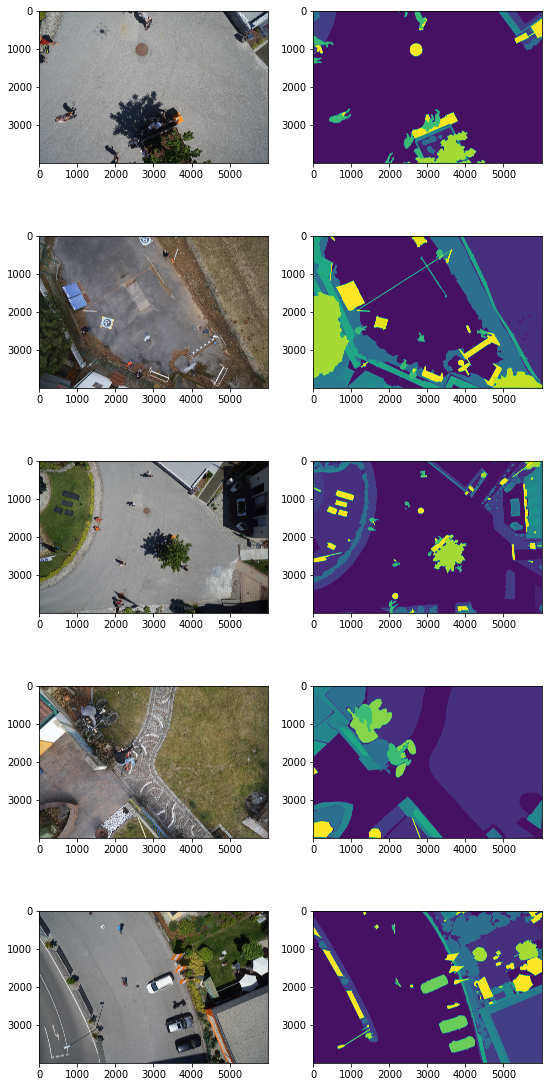

In [24]:
# 5 pairs of original and label images
n_max_imgs = 5

plt.figure(figsize = (9, 20))
for n in range(n_max_imgs):

    image = Image.open(f'C:/Users/leekh/Desktop/drone/dataset/semantic_drone_dataset/original_images/00{n}.jpg')
    image = np.array(image)

    label = Image.open(f'C:/Users/leekh/Desktop/drone/dataset/semantic_drone_dataset/label_images_semantic/00{n}.png')
    label = np.array(label)

    plt.subplot(n_max_imgs, 2, 2 * n + 1)
    plt.imshow(image)

    plt.subplot(n_max_imgs, 2, 2 * n + 2)
    plt.imshow(label)

### Read the CSV metadata file

In [25]:
df = pd.read_csv('class_dict_seg.csv')
df.head()

,name,r,g,b
0,unlabeled,0,0,0
1,paved-area,128,64,128
2,dirt,130,76,0
3,grass,0,102,0
4,gravel,112,103,87


In [26]:
df.name

0       unlabeled
1      paved-area
2            dirt
3           grass
4          gravel
5           water
6           rocks
7            pool
8      vegetation
9            roof
10           wall
11         window
12           door
13          fence
14     fence-pole
15         person
16            dog
17            car
18        bicycle
19           tree
20      bald-tree
21      ar-marker
22       obstacle
23    conflicting
Name: name, dtype: object

In [27]:
class_list = df.name.values.tolist()
print(class_list)
len(class_list)

['unlabeled', 'paved-area', 'dirt', 'grass', 'gravel', 'water', 'rocks', 'pool', 'vegetation', 'roof', 'wall', 'window', 'door', 'fence', 'fence-pole', 'person', 'dog', 'car', 'bicycle', 'tree', 'bald-tree', 'ar-marker', 'obstacle', 'conflicting']


24

#### Excluding the 'unlabelled' class, there are 23 classes in the dataset